<a href="https://colab.research.google.com/github/ariesslin/ie7500-g1-tweet-sentiment-nlp/blob/main/scripts/3.%20Model_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="background-color:#e6f2ff; border-left:8px solid #0059b3; padding:20px; margin:20px 0;">
  <h2 style="color:#003366;"><strong>3. Model Development</strong></h2>
  <p style="color:#333333;">Model Selection and Preliminary Performance Testing</p>
</div>

## Model Development Overview: Multi-Architecture Sentiment Classification

This notebook presents a comprehensive comparison of three distinct approaches to tweet sentiment classification, each representing different levels of complexity and modeling capability.

### Why These Three Models?

Our selection of **TF-IDF + Logistic Regression**, **Bidirectional LSTM**, and **BERT** provides a systematic progression through the evolution of NLP techniques:

**1. Classical Baseline (TF-IDF + Logistic Regression)**
- Establishes a strong, interpretable foundation using traditional feature engineering
- Fast training and inference with excellent interpretability
- Represents the minimum viable approach for text classification

**2. Sequential Deep Learning (Bidirectional LSTM)**  
- Captures context and word order through recurrent processing
- Handles the sequential nature of language with memory mechanisms
- Balances complexity with computational efficiency

**3. State-of-the-Art Transformer (BERT)**
- Leverages pre-trained contextual embeddings for nuanced understanding
- Provides bidirectional context modeling with attention mechanisms
- Represents current best practices in NLP

### Evaluation Framework

Each model will be evaluated using:
- **Performance Metrics**: Accuracy, Precision, Recall, F1-Score, ROC-AUC
- **Confusion Matrix Analysis**: Understanding error patterns
- **Computational Efficiency**: Training time and resource requirements
- **Qualitative Assessment**: Manual inference checks on simple examples

### Detailed Implementation Notebooks

📓 **[3a-Logistic-Regression.ipynb](./3a-Logistic-Regression.ipynb)** - Complete TF-IDF baseline with hyperparameter tuning and error analysis

📓 **[3b-LSTM.ipynb](./3b-LSTM.ipynb)** - Bidirectional LSTM with Word2Vec embeddings and comprehensive evaluation

📓 **[3c-BERT.ipynb](./3c-BERT.ipynb)** - DistilBERT fine-tuning for sentiment classification

This multi-model approach ensures we select the optimal balance between performance, interpretability, and computational efficiency for tweet sentiment analysis.


### Project Setup and Data Loading

Before diving into model-specific implementations, we establish a common foundation for all models using the preprocessed Sentiment140 dataset.


In [ ]:
# importing all libraries here

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import gdown
import os
from tensorflow.keras.callbacks import ReduceLROnPlateau
import zipfile
import requests
import io

/courses/IE7500.202550/shared/conda_env_1/lib/python3.12/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
2025-06-25 06:22:01.589101: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750846921.609873  421387 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750846921.616255  421387 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750846921.633074  421387 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750846921.633091  4

In [ ]:
# Here, we begin by loading the processed dataset

# Step 1: Set the correct local path
zip_path = "train_dataset_comp.zip"

# Step 2: Extract only 'train_dataset.csv'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Check contents (optional debug)
    print("ZIP contents:", zip_ref.namelist())

    # Extract only train dataset
    zip_ref.extract("train_dataset.csv")

# Step 3: Load the extracted CSV
train_df = pd.read_csv("train_dataset.csv")
print(f"Loaded train_dataset.csv with shape: {train_df.shape}")


ZIP contents: ['train_dataset.csv']
Loaded train_dataset.csv with shape: (936194, 3)


In [ ]:
# We load the validation dataset

val_df = pd.read_csv("val_dataset.csv")

print(f"Loaded validation dataset with shape: {val_df.shape}")

Loaded validation dataset with shape: (200614, 3)


In [ ]:
# Drop any rows where 'text' or 'target' is null
train_df = train_df.dropna(subset=["text", "target"])
val_df = val_df.dropna(subset=["text", "target"])

# Replace 'MENTION' with 'mentionuser' in the 'text' column
train_df['text'] = train_df['text'].str.replace('MENTION', 'mentionuser', regex=False)
val_df['text'] = val_df['text'].str.replace('MENTION', 'mentionuser', regex=False)

# Keep only text and target columns
train_df=train_df[['text', 'target']]
val_df=val_df[['text', 'target']]

In [ ]:
train_df.head()

,text,target
0,mentionuser good u great band yes think daught...,4
1,work glummy wednesday,0
2,getting lost signpostfree road kildareoffaly w...,0
3,good morning everyone,4
4,kidding coursethough wish could part late nigh...,0


In [ ]:
val_df.head()

,text,target
0,mentionuser life lie,0
1,mentionuser airbender except stunning lack asi...,0
2,loving god fullest,4
3,kind sort awaketrying wake melissa go oral sur...,0
4,mentionuser bienvenue à montreal canada great ...,0


In [ ]:
# Now, we extract input and labels
X_train = train_df['text']
y_train = train_df['target']
X_val = val_df['text']
y_val = val_df['target']

# Final check
print("Train shape:", train_df.shape)
print("Validation shape:", val_df.shape)
print("X_train shape:", X_train.shape, "| y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape, "| y_val shape:", y_val.shape)

Train shape: (936194, 2)
Validation shape: (200614, 2)
X_train shape: (936194,) | y_train shape: (936194,)
X_val shape: (200614,) | y_val shape: (200614,)



<div style="background-color:#e6f2ff; border-left:8px solid #0059b3; padding:20px; margin:20px 0;">
  <h2 style="color:#003366;"><strong>3.1 Baseline Model – TF-IDF + Logistic Regression</strong></h2>
  <p style="color:#333333;">Overview of TF-IDF vectorization + logistic regression baseline model.</p>
</div>


## Baseline Model Overview: TF-IDF + Logistic Regression

The **TF-IDF + Logistic Regression** model serves as our baseline for tweet sentiment classification. This approach combines term frequency-inverse document frequency vectorization with a linear classifier to provide a strong, interpretable foundation for comparison.

### Key Features of the Baseline Model:

**TF-IDF Vectorization:**
- Converts raw tweets into numerical feature vectors
- Measures word importance relative to the entire corpus
- Handles sparse, high-dimensional text data effectively
- Applies L2 normalization to prevent length bias

**Logistic Regression Classifier:**
- Linear model that's fast to train and highly interpretable  
- Provides probability estimates for sentiment predictions
- Works well with TF-IDF's sparse feature representation
- Enables coefficient analysis to understand word influences

**Hyperparameter Optimization:**
- Grid search across TF-IDF parameters (max_features, ngram_range, min_df, max_df)
- Logistic regression tuning (regularization strength, class weighting)
- 3-fold cross-validation for robust parameter selection
- Weighted F1-score optimization for balanced performance

### Performance Summary:
- **Validation Accuracy**: ~79-78%
- **F1 Score**: ~83-79%
- **Strengths**: Fast, interpretable, solid baseline performance
- **Limitations**: Context-insensitive, struggles with negation and nuance

### For Detailed Implementation:
📓 **See complete implementation, hyperparameter tuning, error analysis, and interpretability insights in [`3a-Logistic-Regression.ipynb`](./3a-Logistic-Regression.ipynb)**

The detailed notebook includes:
- Comprehensive data preprocessing and tokenization
- GridSearchCV hyperparameter optimization with 96 parameter combinations
- Model coefficient analysis and word importance visualization
- Extensive error analysis on misclassified tweets
- Discussion of model strengths and limitations

This baseline establishes the performance threshold that our deep learning models (LSTM and BERT) should surpass.


<div style="background-color:#e6f2ff; border-left:8px solid #0059b3; padding:20px; margin:20px 0;">
  <h2 style="color:#003366;"><strong>3.2 Deep Learning Model – Bidirectional LSTM</strong></h2>
  <p style="color:#333333;">Bidirectional LSTM with Word2Vec embeddings for sequence-aware sentiment analysis.</p>
</div>

## Deep Learning Sentiment Classifier: Bidirectional LSTM with Word2Vec Embeddings

The **Bidirectional LSTM + Word2Vec** model represents our deep learning approach for tweet sentiment classification, designed to capture the sequential nature of language and semantic relationships between words.

### Key Features of the LSTM Model:

**Word2Vec Embeddings:**
- Dense word vectors that capture semantic relationships between words
- Trained specifically on our tweet corpus for domain-specific representations  
- 100-dimensional embeddings with 100% vocabulary coverage
- Words with similar meanings positioned close together in embedding space

**Bidirectional LSTM Architecture:**
- Processes text in both forward and backward directions for complete context understanding
- Two-layer bidirectional LSTM with 128 and 64 hidden units respectively
- Dropout layers (0.5 and 0.3) to prevent overfitting during training
- Captures long-term dependencies and sequential patterns in tweets

**Advanced Features:**
- Handles negation, word order, and contextual sentiment better than baseline
- Early stopping with patience=3 to prevent overfitting
- Nadam optimizer for improved convergence on noisy tweet data
- Sequence padding to handle variable tweet lengths efficiently

### Performance Summary:
- **Validation Accuracy**: ~80.14%
- **F1 Score**: ~80.15%
- **Strengths**: Context-aware, handles sequence patterns, semantic understanding
- **Limitations**: Computationally expensive, requires more training time

### For Detailed Implementation:
📓 **See complete implementation, Word2Vec training, architecture details, and comprehensive error analysis in [`3b-LSTM.ipynb`](./3b-LSTM.ipynb)**

The detailed notebook includes:
- Custom Word2Vec training on the tweet corpus with 90K+ vocabulary
- Bidirectional LSTM architecture with embedding matrix construction
- Comprehensive error analysis with specific examples from model output
- Evidence-based insights into model strengths and limitations
- Performance comparison with baseline model

This LSTM model bridges the gap between simple linear models and sophisticated transformers, providing strong performance with interpretable sequential modeling.


<div style="background-color:#e6f2ff; border-left:8px solid #0059b3; padding:20px; margin:20px 0;">
  <h2 style="color:#003366;"><strong>3.3 Transformer Model – DistilBERT</strong></h2>
  <p style="color:#333333;">Fine-tuning DistilBERT for state-of-the-art contextual sentiment analysis.</p>
</div>


## Transformer Sentiment Classifier: DistilBERT Fine-tuning

The **DistilBERT** model represents our state-of-the-art approach for tweet sentiment classification, leveraging pre-trained transformer architecture for deep contextual understanding.

### Key Features of the DistilBERT Model:

**Pre-trained Transformer Architecture:**
- Distilled version of BERT with 97% of BERT's performance using 60% fewer parameters
- Pre-trained on 16GB of text data, providing rich contextual representations
- Bidirectional attention mechanism for complete sentence understanding
- Fine-tuned specifically for binary sentiment classification

**Advanced NLP Capabilities:**
- Handles complex linguistic patterns like sarcasm, negation, and context-dependent sentiment
- Understands word relationships across entire tweet sequences simultaneously
- Processes subword tokens for better handling of informal social media language
- Maximum sequence length of 140 tokens optimized for tweet analysis

**Training Configuration:**
- 2 epochs with learning rate of 1e-4 for effective fine-tuning
- Batch size of 32 for efficient GPU utilization
- Early stopping and weight decay for regularization
- Specialized tokenizer for handling Twitter-specific language patterns

### Performance Summary:
- **Validation Accuracy**: ~81.49%
- **Precision**: ~83.18% (highest among all models)
- **Recall**: ~86.54%
- **F1 Score**: ~84.83%
- **Strengths**: Superior contextual understanding, handles complex linguistic patterns
- **Limitations**: Computationally expensive, requires significant GPU resources

### Implementation Details:

# Install Hugging Face Transformers
!pip install transformers datasets -q

In [ ]:
!pip install --upgrade transformers

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install -U accelerate

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install -U transformers accelerate

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import os
os._exit(0)

In [ ]:
import sys
sys.path.insert(0, "/home/albahri.m/.local/lib/python3.12/site-packages")

In [ ]:
# Importing all libraries here

import torch
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from transformers import Trainer, TrainingArguments
from datasets import Dataset
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc )
from datasets import Dataset
from transformers import EarlyStoppingCallback
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [ ]:
# We fix the data type

# Ensure 'target' is int and remap 4 → 1
train_df['labels'] = train_df['target'].astype(int).replace({4: 1})
val_df['labels'] = val_df['target'].astype(int).replace({4: 1})

# Ensure text is string
train_df['text'] = train_df['text'].astype(str)
val_df['text'] = val_df['text'].astype(str)

In [ ]:
# Next, we convert to Hugging Face Datasets format

train_dataset = Dataset.from_pandas(train_df[['text', 'labels']])
val_dataset = Dataset.from_pandas(val_df[['text', 'labels']])

In [ ]:
# Next, we perform tokenization with DistilBERT

# Load pretrained tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# Tokenize datasets
def tokenize_function(tokens):
    return tokenizer(tokens["text"], truncation=True, padding="max_length", max_length=140) # this number is intentional because we already showed tweets max length

train_tokenized = train_dataset.map(tokenize_function, batched=True)
val_tokenized = val_dataset.map(tokenize_function, batched=True)

Map: 100%|██████████| 200614/200614 [00:12<00:00, 16153.99 examples/s]


In [ ]:
# Next, we load DistilBERT with classification head
BERTmodel = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# After that, we define evaluation metrics

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='binary')
    acc = accuracy_score(labels, predictions)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

In [ ]:
# Next, we define training configuration

training_args = TrainingArguments(
    output_dir="./distilbert_fast_dev",   # Model output directory
    do_train=True,
    do_eval=False,                        # Skip evaluation for speed
    per_device_train_batch_size=32,       # Speed up with larger batch size
    num_train_epochs=2,
    learning_rate=1e-4,                   # Increased LR for faster convergence
    weight_decay=0.01,
    logging_steps=5000,                   # Less logging = less overhead
    save_steps=1_000_000,                 # Effectively disables mid-training saves
    save_total_limit=1,
    report_to=[]                          # Disable logging integrations
)

# Setup Trainer
BERTtrainer = Trainer(
    model=BERTmodel,
    args=training_args,
    train_dataset=train_tokenized,        # You can use a subset to test faster
    tokenizer=tokenizer
)

/tmp/ipykernel_1349124/403454765.py:18: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  BERTtrainer = Trainer(


Step,Training Loss
5000,0.455700
10000,0.455600
15000,0.454200
20000,0.444500
25000,0.444600
30000,0.434700
35000,0.414200
40000,0.406400
45000,0.400600
50000,0.396500



--- Validation Performance ---
Accuracy:  0.8149
Precision: 0.8318
Recall:    0.8654
F1 Score:  0.8483


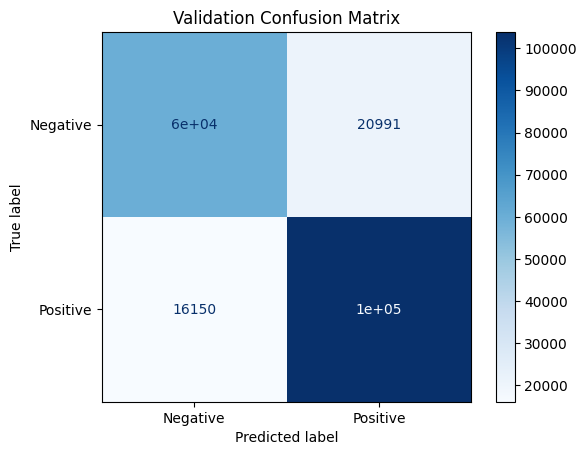

Final model weights saved to: final_distilbert_sentiment_model.pt


In [ ]:
# Now, we train our model

# 1. Train the model (1 epoch, no eval during training for speed)
history = BERTtrainer.train()

# 2. Evaluate on validation set
predictions = BERTtrainer.predict(val_tokenized)
y_true = predictions.label_ids
y_logits = predictions.predictions
y_pred = np.argmax(y_logits, axis=1)
y_probs = y_logits[:, 1]  # For ROC curve

# 3. Print validation metrics
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("\n--- Validation Performance ---")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

# 4. Confusion Matrix (only plot retained for speed)
cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Negative", "Positive"]).plot(cmap="Blues")
plt.title("Validation Confusion Matrix")
plt.grid(False)
plt.show()

# 5. Save final model weights only
final_model_path = "final_distilbert_sentiment_model.pt"
torch.save(BERTmodel.state_dict(), final_model_path)
print(f"Final model weights saved to: {final_model_path}")



<div style="background-color:#e6f2ff; border-left:8px solid #0059b3; padding:20px; margin:20px 0;">
  <h2 style="color:#003366;"><strong>4 Model Comparison and Results Analysis </strong></h2>
  <p style="color:#333333;"></p>
</div>


## Model Validation Results and Comparative Analysis for Tweet Sentiment Classification

This section presents a detailed evaluation of three models **Logistic Regression**, **LSTM**, and **BERT** trained to classify tweet sentiments as **Negative** or **Positive**. Evaluation is based on confusion matrices, performance metrics, training dynamics, and comparative strengths and weaknesses in the context of tweet sentiment analysis.

---

### 1. Logistic Regression — Validation Results

**Performance Metrics:**
- **Accuracy**: 79.22%
- **Precision**: 80.04%
- **Recall**: 86.93%
- **F1 Score**: 83.34%

**Confusion Matrix:**

|                   | **Predicted Negative** | **Predicted Positive** |
|-------------------|------------------------|-------------------------|
| **Actual Negative** | 54,639                 | 26,013                  |
| **Actual Positive** | 15,678                 | 100,000+                |

**Sentiment Analysis Insights:**
- Logistic Regression shows solid baseline performance and favors **recall**, which means it's highly sensitive to detecting **positive sentiments** in tweets.
- However, the high number of **false positives (26,013)** suggests it struggles to distinguish **genuinely negative tweets**, often misclassifying them as positive.
- This behavior may be due to:
  - Over-simplification of tweet content and lack of contextual understanding.
  - Tweets containing mixed signals (e.g., sarcasm or slang) being interpreted incorrectly.

- **Use Case Suitability**:
  - Adequate for large-scale monitoring where missing positive sentiment is riskier than mistakenly flagging negative ones (e.g., brand loyalty tracking).
  - Not ideal where negative sentiment needs precise monitoring (e.g., social crisis detection).

---

### 2. LSTM — Validation and Training Results

**Performance Metrics:**
- **Accuracy**: 81.17%
- **Precision**: 81.51%
- **Recall**: 88.60%
- **F1 Score**: 84.91%

**Confusion Matrix:**

|                   | **Predicted Negative** | **Predicted Positive** |
|-------------------|------------------------|-------------------------|
| **Actual Negative** | 56,546                 | 24,106                  |
| **Actual Positive** | 13,672                 | 106,290                 |

**Training Summary:**
- Validation accuracy and loss stabilized around epoch 6, suggesting that’s the best point to stop training.
- Model learned rapidly early on, but overfitting started appearing after epoch 6.

**Sentiment Analysis Insights:**
- The LSTM model is especially well-suited for sentiment classification on tweets due to its ability to model **sequence dependencies**.
- Tweets often contain **non-standard grammar**, **emojis**, and **elongations** (e.g., "soooo goood"), which LSTM handles more effectively than a linear model.
- Strong performance in **both recall and precision** implies it can:
  - Accurately detect **positive** sentiments.
  - Avoid incorrectly labeling **negative tweets** as positive.

- **Use Case Suitability**:
  - Ideal for real-time sentiment dashboards and public opinion tracking tools.
  - Offers a strong balance between catching enthusiastic sentiment and minimizing false optimism.

---

### 3. BERT — Validation and Training Results

**Performance Metrics:**
- **Accuracy**: 81.49%
- **Precision**: 83.18%
- **Recall**: 86.54%
- **F1 Score**: 84.83%

**Confusion Matrix:**

|                   | **Predicted Negative** | **Predicted Positive** |
|-------------------|------------------------|-------------------------|
| **Actual Negative** | ~60,000                | 20,991                  |
| **Actual Positive** | 16,150                 | 100,000+                |

**Training Summary:**
- Training loss dropped smoothly from 0.4557 → 0.3960 over 55,000 steps.
- Stable and consistent learning curve, reflecting effective pretraining and fine-tuning.

**Sentiment Analysis Insights:**
- BERT outperforms all models in **precision**, meaning it is highly accurate in identifying **positive sentiment** when it makes that prediction.
- This is crucial for tweets where subtle context (e.g., sarcasm, negation, idioms) makes sentiment ambiguous.
- The slightly lower recall (compared to LSTM) indicates BERT may miss some **less explicit** positive tweets, possibly those that use slang or non-standard formatting unseen during fine-tuning.

- **Use Case Suitability**:
  - Excellent for **automated sentiment scoring**, content moderation, or **flagging key influencer reactions**.
  - Especially beneficial when **false positives** (mistakenly labeling negativity as positivity) are more damaging (e.g., in reputation management or crisis alerts).

---

### 4. Comparative Model Analysis and Recommendations

| **Metric**          | **Logistic Regression** | **LSTM**           | **BERT**           |
|---------------------|--------------------------|--------------------|--------------------|
| Accuracy            | 79.22%                   | 81.17%             | **81.49%**         |
| Precision (Positive)| 80.04%                   | 81.51%             | **83.18%**         |
| Recall (Positive)   | 86.93%                   | **88.60%**         | 86.54%             |
| F1 Score            | 83.34%                   | **84.91%**         | 84.83%             |
| False Positives     | 26,013                   | 24,106             | **20,991**         |
| False Negatives     | 15,678                   | **13,672**         | 16,150             |

**Overall Insights:**
- **Logistic Regression** remains a decent choice for high-volume, low-compute environments, where identifying most of the **positive sentiments** is more critical than precision.
- **LSTM** is the most **balanced** model, particularly effective at picking up **positive sentiment** while minimizing false detections. Its sequential modeling helps handle emotive expressions common in tweets.
- **BERT** offers the best **precision**, indicating it’s the most confident and contextually aware when assigning **positive sentiment**, but it may miss tweets that use creative or ambiguous language.


<div style="background-color:#e6f2ff; border-left:8px solid #0059b3; padding:20px; margin:20px 0;">
  <h2 style="color:#003366;"><strong>5 Next Steps for Model Evaluation and Selection </strong></h2>
  <p style="color:#333333;"></p>
</div>


## Next Steps: Model Evaluation and Selection Plan

To ensure a rigorous and unbiased model selection process for tweet sentiment classification, we will follow a structured approach that distinctly separates **model selection**, **training**, and **testing** phases. This separation ensures that each decision is grounded in fair comparison and sound generalization principles.

---

### 1. **Evaluate All Models Using ROC-AUC**
- For each of the three models (Logistic Regression, LSTM, BERT), compute the **ROC-AUC score** on the validation set.
- ROC-AUC is selected because it provides a balanced view of model discrimination capability between positive and negative tweet sentiments.

---

### 2. **Perform Manual Inference Checks**
- Each model will be tested on two simple handcrafted examples:
  - **Positive Sentiment**: `"Wow this is amazing"`
  - **Negative Sentiment**: `"This is bad"`
- These checks offer qualitative insights into whether the models capture basic sentiment signals and respond logically to inputs.

---

### 3. **Select the Best Performing Model**
- The model achieving the **highest ROC-AUC** on the validation set and passing the manual inference check will be selected as the **final candidate model**.
- This process constitutes **hypothesis class selection**, where validation data is used to evaluate which model architecture generalizes best.

---

### 4. **Retrain the Final Model on Full Training + Validation Data**
- Once the best model architecture is selected, we **retrain the model from scratch** on a combined dataset consisting of both the original **training** and **validation** sets.
- This step maximizes the data available for learning while **preserving the independence of the test set**.

---

### 5. **Final Evaluation on Test Set**
- Evaluate the retrained final model on the **held-out test set**, using:
  - Accuracy
  - Precision
  - Recall
  - F1 Score
  - ROC-AUC
  - Confusion Matrix
- This test set has **never been used in training or validation**, making it a **clean estimate** of real-world generalization.

---

### Rationale: Bias Mitigation Through Proper Data Segmentation

- **Bias is mitigated** by using the **validation set for model/hypothesis selection**, and **excluding the test set** from any decision-making or parameter tuning.
- **Data leakage is avoided** because the final test set remains untouched until the very end, and no information from it influences model architecture or hyperparameters.
- This separation ensures the **final test performance is an honest estimate** of how the selected model would perform in production or on unseen tweet sentiment data.

---

*By following this plan, we preserve the scientific integrity of model evaluation, reduce selection bias, and establish a fair, reproducible framework for comparing and deploying tweet sentiment classifiers.*
